# CFD Simulation Case Setup

** The created CFD domain is now read into the CFD package of interest to setup the CFD simulation. It should be noted that the current tutorial has a significant difference compared to other available CFD tutorials online! This tutorial is structured and developed based on a generic and methodological approach to set up a CFD simulation. The first principals and reasonings for each setting is discussed at each step. Potential alterations and modifications to perform similar analysis for different flow conditions are also addressed and discussed. Hence, in the end user will have the capability of applying potential modifications, improvements or extending the application of the current CFD simulation to a more complex problem of interest, rather than having a one time successful run of a specific simulation with specific and strictly pre-defined boundary conditions. **

> **_In simple words: Current tutorial teaches users to fish, rather than giving them a fish._**


## Setting up a CFD simulation has following four steps:

1. ###### Setup Model/s:   
According to the physics of the flow field user will select required model/s to simulate the flow.

2. ###### Setup Working Fluid/s & Solid/s:   
User will define the physical and thermodynamical properties of the working fluid/s and solid/s in the problem.    

3. ###### Setup Boundary & Zone Conditions:    
Solving the governing equations of the flow (i.e. system of partial differential equations) requires well-defined boundary conditions within the CFD domain. These conditions are selected and defined in this step.

4. ###### Setup Solution Methods:    
In CFD simulations the governing equations of the flow are solve numerically. Based on the physics of the problem appropriate numerical schemes and solution methods are selected at this step.

In the following section the details for the above four steps for the CFD simulation setup for 3D flow over a horizontal axis wind turbine are explained in great details. It should be noted that the path for defining conditions and other settings are provided in `command line` format. Users can access exact same settings and options by following the provided path via the tree of progress or pull down menu in ANSYS FLUENT. The summary of the steps to take for CFD simulation setup for problem of 2D laminar flow over a flat plate are as follows:

1. <span style=style="background-color:lightgrey;">/define/models/steady</span>   
2. <span style=style="background-color:lightgrey;">/define/models/solver/pressure-based</span>    
3. <span style=style="background-color:lightgrey;">/define/models/viscous/laminar</span> 
4. <span style=style="background-color:lightgrey;">/define/user-defined/compiled-functions/compile</span>
5. <span style=style="background-color:lightgrey;">/define/user-defined/function-hooks</span>
6. <span style=style="background-color:lightgrey;">/file/read/scheme</span>
7. <span style=style="background-color:lightgrey;">/define/material/change-create</span>    
8. <span style=style="background-color:lightgrey;">/define/boundary-conditions/fluid</span>   
9. <span style=style="background-color:lightgrey;">/define/boundary-conditions/velocity-inlet</span>    
10. <span style=style="background-color:lightgrey;">/define/boundary-conditions/pressure-outlet</span>   
11. <span style=style="background-color:lightgrey;">/define/boundary-conditions/wall</span>   
12. <span style=style="background-color:lightgrey;">/solve/set/discretization-scheme</span>    
13. <span style=style="background-color:lightgrey;">/solve/set/under-relaxation</span>   
14. <span style=style="background-color:lightgrey;">/solve/initialize/compute-defaults/velocity-inlet</span>    
15. <span style=style="background-color:lightgrey;">/solve/iterate</span>

Following is the step-by-step explanation for each of the above command/setting procedure:

**1. Setup Model/s:**
* In the majority problems of flow over a turbine it is assumed the free stream flow is uniform and steady. Therefore, the steady model is chosen to develop the CFD simulation: <span style=style="background-color:lightgrey;">/define/models/steady</span>. It is important to note that since VBM averages the effect of rotating blades and the assigned rotational speed of the turbine is defined to be constant, by default all the case studies that use the VBM should be run in steady mode, unless the model User Defined Functions (UDFs) are modified for unsteady implementation. In those cases the selected model for simulation setup will still be viscous, however the appropriate transient model should be selected at this step. 

* In this problem we are considering that the flow is in subsonic regime. Therefore, variation of density with respect to the pressure can be neglected. As a result of this assumption one can define the working fluid to be incompressible: <span style=style="background-color:lightgrey;">/define/models/solver/pressure-based</span>. In cases that the speed of the flow enters sonic and supersonic regimes ( Mach # > 0.3 ), the changes in density (i.e. compressibility) of the flow will be an important factor and the solver must be defined as density-based.

* For majority of full scale turbine the flow field Reynolds number, based on the turbine's mean chord length has large order of magnitudes, which makes the flow turbulent. In the current problem the flow field Reynolds number, based on the turbine's 1 [m] chord length, is about $10^6$. Thus, this flow field is also fully turbulent and the suitable turbulent (closure) model should be selected. The selection of the turbulent model is strongly a function of application and Reynolds number of the problem. Based on these two factors a suitable model should be selected. In case users don't have the sufficient background for this selection it is highly recommended to perform an in-depth research and learn more about previous CFD works on their application of interest, instead of blindly iterating between different closure models. For this specific case study [Javaherchi et. al.](http://wie.sagepub.com/content/38/2/181.short) [1] proved that the Spalart-Allmaras is a suitable model for this flow field and application. User can select this model via path of <span style=style="background-color:lightgrey;">/define/models/viscous/spalart-allmaras</span>. 

* The last step for to setup the required models for this case study is enabling the VBM model inside ANSYS FLUENT. VBM is a set of User Defined Functions (UDFs) that was developed in C language for the use in ANSYS FLUENT and can be integrated with other available models and solvers in this CFD commercial package. The general framwork of this algorithm was first published by [Zori et. al.]() [2]. The required UDF files are available in the Simulation_Src directory. User are recommended to download them and follow the two steps below to compile them and enable the VBM model in ANSYS FLUENT:

* Step 1) Using the path <span style=style="background-color:lightgrey;">/define/user-defined/compiled-functions/compiled-functions</span> select the two sources script files `rotor_model_v10.1.c` and `thread_mem_v1.0.c` along with the header file `thread_mem.h`. Then build and load them up inside ANSYS FLUENT. This process will create a local directory named `libudf` on your local machine to read and write data from. 

* Step 2) Using the path <span style=style="background-color:lightgrey;">/file/read/scheme</span> from the top drop-down menu read the `rotor_model_v10.scm` file. After reading this file the name of the `Virtual Blade Model` will appear among the list of available models inside ANSYS FLUENT in `Off` mode. Double click on this name will open the rotor panel window and turn the model `On`.

**1.1 Setup VBM Model:**

Once the user opens the Virtual Blade Model (VBM) panel a new window will pop-up which is called the `Rotor Inputs` panel. The panel is where the user would provide geometrical information of the turbine to be simulated via VBM. As shown in Fig. 1 the `Rotor Input` panel has three tabs of `General`, `Geometry` and `Triming`. The `Triming` tab can be enables by choosing the `Triming` option on top. However it is not useful for the simulation of horizontal axis wind or tidal turbine and can remain disabled.

<img src="./Images/rotor_inputs_panel.png" width="700">
Fig. 1 - The Virtual Blade Model (VBM) Rotor Inputs panel and it's two tabs, filled with the geometrical information of the NREL Phase VI two bladed wind turbine.

Following are a brief description on the required inputs of the `General` tab:

* `Number of Blades`: The number of the turbine blade/s. The NREL Phase VI is a two bladed wind turbine, thus the input here is 2.

* `Rotor Radius`: The radius of the turbine blade. The NREL Phase VI is a two bladed wind turbine, thus the input here is 5.53.

* `Rotor Speed`: The angular speed of the rotor blade. If the user input has a different units, the default units can be changed using the path `\define\units [angular-velocity]`.

* `Tip Effect`: Since the VBM in inherently a 2D model and flow field close to the tip of the blade becomes highly 3D a correction is implemented for the remaining specified percentage of the blade span. Meaning that recommended input of 96 [%] will apply a correction to the estimated lift and drag coefficient (force) values at the last 4 [%] of the blade span.

* `Rotor Disk Origin`: The EXACT cartesian coordinates of the defined rotor face created in the CFD domain. Users were advice to write this value down during the geometry and mesh generation of the CFD domain. It is highly recommended to input to EXACT values from the geometry of the CFD domain. Otherwise error might occur in next steps.

* `Rotor Face Zone`: The name of the pre-defined, full 360 [deg] circle, as the rotor face created in the CFD domain step should be selected/highlighted from the list.

* `Rotor Disk`: This section takes geometrical angle of the `Rotor Disk`. Usually for wind and tidal turbines rotor disk don't have zero `Pitch Angle`. The `Bank Angle`, on the other hand, defines the orientation of the rotor disk. By default VBM takes the initial orientation of the rotor disk's axis of rotation to be aligned with the positive $z$-axis (i.e. 0 [deg] `Bank Angle`). Fig. 2 visualizes the definition and positive orientation of each angle. In cases that the rotor's axis of rotation has an angle with positive $z$-axis, which is majority the case, the value should be input here. Note that, as shown in Fig. 2, the `Bank Angle` is mathematically positive around $x$-axis.

<img src="./Images/bank_angle.png" width="400">
Fig. 2 - Visualization of the turbine Rotor Disk's Origin, Pitch Angle and Bank Angle.

* `Blade Pitch`: Again for the wind and tidal turbine application the turbine blades are relatively stiff and their local pitch angle does not change as the blade rotates around it's central axis, as oposed to helicopter blades. However, the entire blade span usually has a `Collective pitch` angle, sometimes referred to as `Pitch` angle, relative to incoming flow. The role of this angle, in collaboration with twist angle, is to moderate the value angle of attack distribution along the blade span from root to the tip. This value is constant and mostly fixed (unless the turbine is variable pitch). The sign of this angle depends on the orientation of the define cartesian coordinates of the CFD domain (see Fig. 3).

<img src="./Images/pitch_angle.png" width="700">
Fig. 3 - Visualization of the turbine blade Pitch and Twist Angles.

* `Blade Flapping`: Again these angles don't apply to the simulation of rigid blades of wind and tidal turbines. So their input values will be zero.

Following are a brief description on the required inputs of the `Geometry` tab. In this tab user will input the geometrical specifications of up-to 20 sections along the blade span.

* `Number of Sections`: The number of sections that user wants to divide the blade span into from 1 to 20.
* `Radius`: The radial position of the center of each blade section normalized by the value of blade radius.
* `Chord`: The mean value of the chord length between the top and bottom airfoils of the section.
* `Twist`: The mean value of the twist angle between the top and bottom airfoils of the section (See Fig. 3).
* `File Name`: Name of the lookup table of the lift and drag coefficients as a function of angle of attack and type of the airfoil cross section. Fig. 4 visualizes the structure of this lookup table. Users should develop this table, with the same structure, save it with * .dat extension and locate it in the working directory with the VBM UDFs. 


**2. Setup Working Fluid/s & Solid/s:** (Add the required bullet points with details explanations. Keep the title but remove the color)

* Explain how and why you define the working Fluid and Solids in your model. If no obligation is limiting you, define your fluid properties such that the most important non-dimensional variables of the flow field (e.g. Reynolds number) are matched.

<br>
<font color='red'>**3. Setup Boundary and Zone Conditions:** (Add the required bullet points with details explanations. Keep the title but remove the color)</font>

* Explain the boundary and zone conditions chosen and defined within your CFD domain. 
* Link your choices, with reasonable arguments, to the discussed physical principals and fundamentals discussed in Physics section.
* Discuss potential changes in the boundary condition if applicable for slightly different case studies.

<br>
<font color='red'>**4. Setup Solution methods:** (Add the required bullet points with details explanations. Keep the title but remove the color)</font>

* Explain your choices for numerical scheme and models to solve the flow field governing equations numerically.
*  Link your choices, with reasonable arguments, to the discussed physical principals and fundamentals discussed in Physics section.

Now that all boundary conditions and settings for the CFD simulation are defined. User can **initialize** the solution through an educated guess to start the iteration process: `/solve/initialize/compute-defaults/velocity-inlet`
Solution initialization would incept the flow field variables, such as velocity and pressure, based on the defined values by user. For the current problem the CFD domain is recommended to be initialize by values of velocity and pressure at the inlet.

Iteration process for solving the flow field governing equation now shall start till converged solution is obtained:`solve/iterate`. A general rule of thumb for converged solution is to have continuity residuals of 10E-3. More details about commenting on validity of solution and convergence criteria will be discussed in next section.

<font color='red'> Remove the following sections when finalizing your Simulation file </font> 

# Handy Commands for Writing the Simulation file: 

## Insert a Figure

```
<img src="./Images/sample.jpg" width="500">
</br>
Fig. 1 - The caption for the image goes here.
```

<img src="./Images/sample.jpg" width="500">
</br>
Fig. 1 - The caption for the image goes here.

## Insert a YouTube video Available on the SFO Channel 

Create a new cell using `Edit/Split Cell` path and insert the following lines in the newly created cell and compile it, while in `Code` environment rather than `Markdown` environment.

```
from IPython.display import YouTubeVideo
YouTubeVideo("kyAJiOXQIq4")
```

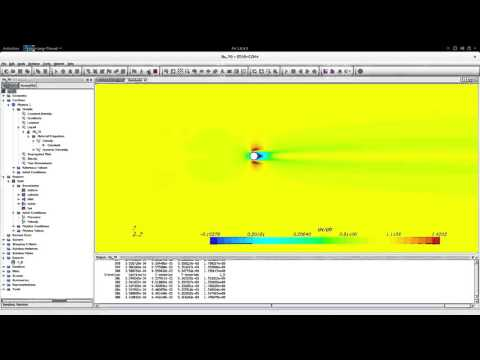

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("kyAJiOXQIq4")

## Write an Equation

### Within Text Body
Use single `$ <equation> $` symbol to put and equation (e.g. ```$y = \delta ~,~ u = 0.99 ~U_e .$```) within the text body.

Use single `$ <equation> $` symbol to put and equation (e.g. $y = \delta ~,~ u = 0.99 ~U_e .$) within the text body.

### Standalone
```
Use double `$$ <equation> $$` symbol to put equation in standalone format in the center of the page:

$$
\mathbf{R_{ext}} + \mathbf{F_v} -
\int \mathbf{n}~p~dA +
\int \rho \mathbf{g}~dV = 
\frac{\partial}{\partial t} \int \rho \mathbf{V} dV +
\int (\mathbf{n}~.~\rho \mathbf{V}) \mathbf{V} dA .
$$
```

Use double `$$ <equation> $$` symbol to put equation in standalone format in the center of the page:

$$
\mathbf{R_{ext}} + \mathbf{F_v} -
\int \mathbf{n}~p~dA +
\int \rho \mathbf{g}~dV = 
\frac{\partial}{\partial t} \int \rho \mathbf{V} dV +
\int (\mathbf{n}~.~\rho \mathbf{V}) \mathbf{V} dA .
$$


## Cite Source(s)
```
> For more details on the physics, theory and equation derivation please see chapter 9, section 9.2 of "A Physical Introduction to Fluid Mechanics by Alexander J. Smits" 2nd edition. [Download Book Here!](http://www.efluids.com/efluids/books/efluids_books.htm)
```

> For more details on the physics, theory and equation derivation please see chapter 9, section 9.2 of "A Physical Introduction to Fluid Mechanics by Alexander J. Smits" 2nd edition. [Download Book Here!](http://www.efluids.com/efluids/books/efluids_books.htm)